In [1]:
####### Example for loading distance matrix using basic PHYLIP format (http://www.phylo.org/tools/obsolete/phylip.html)

# Line number 1 provides number of species
# Rest rows are distance matrix
# The parse function will return a list containing the species names, and a disctionary containing distance matrix

dist_matrix = """5
A 0	20	60	100	90
B 20	0	50	90	80
C 60	50	0	40	50
D 100	90	40	0	30
E 90	80	50	30	0"""


# utility file for reading distance matrices stored in basic PHYLIP format (http://www.phylo.org/tools/obsolete/phylip.html)

def parse(distance_matrix):
    """Read matrix of distances form Phylip-formatted file.(http://www.phylo.org/tools/obsolete/phylip.html)

    Return list of names and dictionary structure such that
    d[a][b] is the distance between names[a] and names[b].
    """
    try:
        #with open(filename) as src:
        #    lines = [line.strip() for line in src if line.strip()]
        lines = distance_matrix.split("\n")
        try:
            n = int(lines[0])
        except ValueError:
            raise ValueError('First line of file should contain number of samples')

        if n < 2:
            raise ValueError('N must be 2 or more')

        if len(lines) < 1+n:
            raise ValueError('Not enough lines of data')

        names = [line.split()[0] for line in lines[1:1+n]]
        dist = []
        for k in range(n):
            pieces = lines[1+k].split()[1:]
            try:
                vals = [float(v) for v in pieces]
            except ValueError:
                raise ValueError('invalid distance on line ' + str(2+k))

            if len(vals) != n:
                raise ValueError('line %d should have %d entries' % (2+k,n))

            dist.append( { j : vals[j] for j in range(n) } )
    except IOError:
        print('Unable to open file:',filename)
        raise

    return names,dist

In [2]:
names,dist = parse(dist_matrix)

N = len(names) # number of leaves



print("Number of leaves: ", N)

print("The leaf nodes: ", names)

print("Distance matrix: ", dist)

Number of leaves:  5
The leaf nodes:  ['A', 'B', 'C', 'D', 'E']
Distance matrix:  [{0: 0.0, 1: 20.0, 2: 60.0, 3: 100.0, 4: 90.0}, {0: 20.0, 1: 0.0, 2: 50.0, 3: 90.0, 4: 80.0}, {0: 60.0, 1: 50.0, 2: 0.0, 3: 40.0, 4: 50.0}, {0: 100.0, 1: 90.0, 2: 40.0, 3: 0.0, 4: 30.0}, {0: 90.0, 1: 80.0, 2: 50.0, 3: 30.0, 4: 0.0}]




---
**Part 1: Recursive implementation for Neighbor-Joining Algorithm**




---



In [3]:
dist_matrix_q1 = """4
A 0 2 4 4 
B 2 0 4 4
C 4 4 0 2
D 4 4 2 0"""


In [4]:
names_q1,dist_q1 = parse(dist_matrix_q1)

N = len(names_q1) # number of leaves



print("Number of leaves: ", N)

print("The leaf nodes: ", names_q1)

print("Distance matrix: ", dist_q1)

Number of leaves:  4
The leaf nodes:  ['A', 'B', 'C', 'D']
Distance matrix:  [{0: 0.0, 1: 2.0, 2: 4.0, 3: 4.0}, {0: 2.0, 1: 0.0, 2: 4.0, 3: 4.0}, {0: 4.0, 1: 4.0, 2: 0.0, 3: 2.0}, {0: 4.0, 1: 4.0, 2: 2.0, 3: 0.0}]




---
* Step1: Define the base case of Neighbor-Joining (N=2)


In [5]:
#assume we have left a b in the matrix a= index(0), b= index(1)

# print(dist[names_q1.index(names[0])][names_q1.index(names[1])]) 
print(dist_q1[names_q1.index("A")][names_q1.index("B")])
print(dist_q1[0][1])#Row:A, Col:B
d= dist_q1[names_q1.index("A")][names_q1.index("B")]/2
print(d)




2.0
2.0
1.0




---
* Step 2: Transform the D to D* to get neighbor-joining matrix
* Step 3: Find elements i and j such that D*(i,j) is a minimum non-diagonal element of D*


In [6]:
##D to D*
import copy
print(sum(dist_q1[names_q1.index("A")].values()))


index = []
for i in range(len(names_q1)) : index.append(i)

rowSum = []
for i in index:
  rowSum.append(sum(dist_q1[names.index(names_q1[i])].values()))
print(rowSum)
min = 0
x_y=[] #row,col

dist_copy = copy.deepcopy(dist_q1)

for i in range(len(names_q1)): #row
  for j in range(len(names_q1)): #column
    if i == j:
      dist_copy[i][j] = 0
    else:
      key = dist_copy[i][j]
      D_calculate = (len(dist_copy)-2)*key-rowSum[i]-rowSum[j]
      dist_copy[i][j] = D_calculate
      if D_calculate<min:
        min = D_calculate
        x_y.clear()
        x_y.append(i)
        x_y.append(j)
print(dist_q1) # D
print(dist_copy) # D*
print(x_y)

10.0
[10.0, 10.0, 10.0, 10.0]
[{0: 0.0, 1: 2.0, 2: 4.0, 3: 4.0}, {0: 2.0, 1: 0.0, 2: 4.0, 3: 4.0}, {0: 4.0, 1: 4.0, 2: 0.0, 3: 2.0}, {0: 4.0, 1: 4.0, 2: 2.0, 3: 0.0}]
[{0: 0, 1: -16.0, 2: -12.0, 3: -12.0}, {0: -16.0, 1: 0, 2: -12.0, 3: -12.0}, {0: -12.0, 1: -12.0, 2: 0, 3: -16.0}, {0: -12.0, 1: -12.0, 2: -16.0, 3: 0}]
[0, 1]




---

* Step 4: Calculate limblength i and limblength j

In [7]:
#limb length
neighbor = dist_q1[x_y[0]][x_y[1]]
print(neighbor)
delta_ij = (rowSum[x_y[0]] - rowSum[x_y[1]]) / (len(dist_copy) - 2)
limblength_i = (neighbor + delta_ij)/2
limblength_j = (neighbor - delta_ij)/2

print(limblength_i,limblength_j)

2.0
1.0 1.0




---
Step 5: add a new row/column m to D and calcualte distance between m to other nodes


In [8]:
print(names_q1[0])
print(ord(names_q1[0]))
print(names_q1[1])
print(ord(names_q1[1]))
print(chr(67))

A
65
B
66
C


In [9]:
basecase=65 #ASCII
test = ["A","B","C","D"] #if I want to append E
print(chr(len(test)+basecase))
test.append(chr(len(test)+basecase))
print(test) #ABCDE
test.append(chr(len(test)+basecase))
print(test) #ABCDEF

E
['A', 'B', 'C', 'D', 'E']
['A', 'B', 'C', 'D', 'E', 'F']


In [10]:
# print(names_q1)
# index = []
# for i in range(len(names_q1)) : index.append(i)
# for i in range(len(x_y)): index.remove(i) # remove ij
# print(index)
# print(dist_q1[x_y[0]][index[0]]) 
# print(dist_q1[x_y[0]][x_y[1]]) # Dij value
# dParent_node1 = (dist_q1[x_y[0]][index[0]] + dist_q1[x_y[1]][index[0]] - dist_q1[x_y[0]][x_y[1]]) / 2 # calculate node1 to Parent
# dParent_node2 = (dist_q1[x_y[0]][index[1]] + dist_q1[x_y[1]][index[1]] - dist_q1[x_y[0]][x_y[1]]) / 2 # calculate node2 to Parent
# print(dParent_node1)
# print(dParent_node2)


In [11]:
# # add parent node to names_q1
# basecase=65 #ASCII
# names_q1.append(chr(len(names_q1)+basecase))
# print(names_q1)

In [12]:
# print(dist_q1)



---
* Step 6: remove rows/columns i and j from D

In [13]:
# import pandas as pd
# pd_table = pd.DataFrame(dist_q1)
# print(pd_table)

In [14]:
# ## pd_ref_change index and column value: 
# ## https://www.geeksforgeeks.org/python-change-column-names-and-row-indexes-in-pandas-dataframe/
# pd_table_trim = pd_table.drop(index=[x_y[0],x_y[1]],columns=[x_y[0],x_y[1]]) #drop row,drop column
# # pd_table_trim = pd_table_trim.rename(index=lambda x: x - len(pd_table_trim.index),columns= lambda x: x - len(pd_table_trim.index))

# pd_table_trim_dict =pd_table_trim.to_dict()

# dist_trim = []
# length = pd_table_trim.index
# for i in range(len(pd_table_trim_dict)):
#   dist_trim.append(pd_table_trim_dict[i+len(pd_table_trim.index)])

# print(dist_trim)

In [15]:
# for i in range(len(dist_trim)):
#   print(dist_trim[i])

In [16]:
# for i in range(len(dist_q1)):
#   print(dist_q1[i])


In [17]:
# #add parent distance to dist_trim
# print(dist_trim[0])
# print(len(names_q1)-1)
# dist_trim[0][len(names_q1)-1] = dParent_node1
# dist_trim[1][len(names_q1)-1] = dParent_node2
# dist_trim.append({})
# dist_trim[2][index[0]] = dParent_node1
# dist_trim[2][index[1]] = dParent_node2
# dist_trim[2][len(names_q1)-1] = 0
# print(dist_trim[0])
# print(dist_trim[1])
# print(dist_trim[2])

In [18]:
# for i in range(len(dist_trim)):
#   print(dist_trim[i])

In [19]:
# Step5,6 final
# index = []
# for i in range(len(names_q1)) : index.append(i)
for i in range(len(x_y)): index.remove(x_y[i]) # remove ij

dParent_node1 = (dist_q1[x_y[0]][index[0]] + dist_q1[x_y[1]][index[0]] - dist_q1[x_y[0]][x_y[1]]) / 2 # calculate node1 to Parent
dParent_node2 = (dist_q1[x_y[0]][index[1]] + dist_q1[x_y[1]][index[1]] - dist_q1[x_y[0]][x_y[1]]) / 2 # calculate node2 to Parent

# add parent node to names_q1
basecase=65 #ASCII
names_q1.append(chr(len(names_q1)+basecase))

# trim ij node
# method1
# import pandas as pd
# pd_table = pd.DataFrame(dist_q1)
# pd_table_trim = pd_table.drop(index=[x_y[0],x_y[1]],columns=[x_y[0],x_y[1]]) #drop row,drop column
# pd_table_trim_dict =pd_table_trim.to_dict()
# dist_trim = []
# for i in range(len(pd_table_trim_dict)):
#   dist_trim.append(pd_table_trim_dict[i+len(pd_table_trim.index)])
# dist_trim[0][len(names_q1)-1] = dParent_node1
# dist_trim[1][len(names_q1)-1] = dParent_node2
# dist_trim.append({})
# dist_trim[2][index[0]] = dParent_node1
# dist_trim[2][index[1]] = dParent_node2
# dist_trim[2][len(names_q1)-1] = 0

#method2
matrix = copy.deepcopy(dist_q1)

del matrix[x_y[0]] #remove row i
del matrix[x_y[1]-1]#remove row j

for i in matrix: #remove key i, key j 
  for j in x_y:
    del i[j]




# add parent distance to dist_trim(matrix)
matrix[0][len(names_q1)-1] = dParent_node1
matrix[1][len(names_q1)-1] = dParent_node2
matrix.append({})
matrix[2][index[0]] = dParent_node1
matrix[2][index[1]] = dParent_node2
matrix[2][len(names_q1)-1] = 0




In [20]:
for i in range(len(matrix)):
  print(matrix[i])

{2: 0.0, 3: 2.0, 4: 3.0}
{2: 2.0, 3: 0.0, 4: 3.0}
{2: 3.0, 3: 3.0, 4: 0}


In [21]:
print(matrix)

[{2: 0.0, 3: 2.0, 4: 3.0}, {2: 2.0, 3: 0.0, 4: 3.0}, {2: 3.0, 3: 3.0, 4: 0}]


In [22]:
names_q1.remove(names_q1[x_y[0]])
names_q1.remove(names_q1[x_y[1]])
print(names_q1)

['B', 'D', 'E']


In [23]:
print(ord(names_q1[-1])-65+1)

5


In [24]:
names_q1.append(chr(ord(names_q1[-1])+1))
print(names_q1)

['B', 'D', 'E', 'F']


In [25]:
a = ["A",'B',"C"]
index_dict=[]
for i in a : index_dict.append(ord(i)-65)
print(index_dict)

[0, 1, 2]




---



Neighbor_Joining2 fix the ASCII index problem, bc I use ord() value to track my work, so ONLY single continuous CHAR as names will work with my function

In [26]:
def Neighbor_Joining2(names, dist,ASCII):
    #--------------------------------------------------------
    # Step 1: Define the base case of Neighbor-Joining (N=2)
    #         Return the tree consisting of a single edge of length D(1,2)
    #--------------------------------------------------------
    ascii = ord(ASCII)
    if len(dist) == 2:
      finalTree = (dist[0][ord(names[-1])-ascii], (names[0],(),()), (names[1],(),()))
      return finalTree
    #--------------------------------------------------------
    # Step 2: Transform the D to D* to get neighbor-joining matrix
    #--------------------------------------------------------
    #calculate the row sum
    import copy
    index = [] #for the rows
    index_dict=[] # for the dict keys
    for i in range(len(names)) : index.append(i)
    for i in names : index_dict.append(ord(i)-ascii)
    rowSum = []
    for i in index:
      rowSum.append(sum(dist[names.index(names[i])].values()))

    #update D* matrix
    dist_copy = copy.deepcopy(dist)
    min = 0
    x_y=[] #row,col
    count=0 # this is to make sure diagonal value need to be 0
    for i in index: #row
      for j in index_dict: #column
        if i == count:
          dist_copy[i][j] = 0 #diagonal line
          count+=1
        else:
          key = dist_copy[i][j]
          D_calculate = (len(dist_copy)-2)*key-rowSum[i]-rowSum[count]
          dist_copy[i][j] = D_calculate
          if D_calculate<min:
            min = D_calculate
            x_y.clear()
            x_y.append(i)
            x_y.append(count) # update min row,col
          count+=1
      count=0

    #--------------------------------------------------------
    # Step 3: Find elements i and j such that D*(i,j) is a minimum non-diagonal element of D*
    #--------------------------------------------------------
    #I combine this step in step2

    #--------------------------------------------------------
    # Step 4: Calculate limblength i and limblength j
    #--------------------------------------------------------
    neighbor = dist[x_y[0]][index_dict[x_y[1]]]
    delta_ij = (rowSum[x_y[0]] - rowSum[x_y[1]]) / (len(dist_copy) - 2)
    limblength_i = (neighbor + delta_ij)/2
    limblength_j = (neighbor - delta_ij)/2
    subTree = (limblength_i,limblength_j,(names[x_y[0]],(),()),(names[x_y[1]],(),()))

    #--------------------------------------------------------
    # Step 5: add a new row/column m to D and calcualte distance between m to other nodes
    #--------------------------------------------------------
    # index = []
    # for i in range(len(names)) : index.append(i)
    for i in range(len(x_y)): index.remove(x_y[i]) # remove ij
    dParent_node = []
    for i in index:
        cal = (dist[x_y[0]][index_dict[i]] + dist[x_y[1]][index_dict[i]] - dist[x_y[0]][index_dict[x_y[1]]]) / 2
        dParent_node.append(cal)
    
    # add parent node to names
    #ASCII
    names.append(chr(ord(names[-1])+1))

    # trim ij node
    matrix = copy.deepcopy(dist)

    count=0
    for i in x_y: #remove row i,j
        del matrix[i-count]
        count+=1
  
    for i in matrix: #remove key i, key j 
      for j in x_y:
        del i[index_dict[j]]

    # add parent distance to dist_trim(matrix)
    for i in range(len(matrix)):
        matrix[i][ord(names[-1])-ascii] = dParent_node[i]
    matrix.append({})
    for i in range(len(dParent_node)):
        matrix[len(matrix)-1][index_dict[index[i]]] = dParent_node[i]
    matrix[len(matrix)-1][ord(names[-1])-ascii] = 0
    
    #print((limblength_i,limblength_j,(names[x_y[0]],(),()),(names[x_y[1]],(),())))
    #update names, remove ij
    del names[x_y[0]] #remove name i
    del names[x_y[1]-1]#remove name j
    
    #--------------------------------------------------------
    # Step 6: remove rows/columns i and j from D
    #--------------------------------------------------------
    # combine with step 5

    #--------------------------------------------------------
    # Step 7: Call Neighbor_Joining function recursively on reduced distance matrix to get Tree_reduced.
    #--------------------------------------------------------
    finalTree = Neighbor_Joining2(names, matrix,ASCII)
    #--------------------------------------------------------
    # Step 8: Add two new limbs (connecting node m with leaves i and j) to the tree T
    #         assign length limblength_i to limb i
    #         assign length limblength_j to limb j
    #--------------------------------------------------------
    #print((limblength_i,limblength_j,(names[x_y[0]],(),()),(names[x_y[1]],(),())))
    if len(finalTree[1]) != 4:  # (d,("A",(),()),(("b",(),())))
      return (finalTree[0],subTree,finalTree[2])
    else:
      return (finalTree[0],finalTree[1],subTree)
    
    # 4 == (limblength_i,limblength_j,(names[x_y[0]],(),()),(names[x_y[1]],(),()))
    # in the basecase it look like ("str",(),()) --> len() ==3
   

Q1

In [27]:
dist_matrix_Q1 = """4
A 0 2 4 4 
B 2 0 4 4
C 4 4 0 2
D 4 4 2 0"""
names_Q1,dist_Q1 = parse(dist_matrix_Q1)

N = len(names_Q1) # number of leaves



print("Number of leaves: ", N)

print("The leaf nodes: ", names_Q1)

print("Distance matrix: ", dist_Q1)

Number of leaves:  4
The leaf nodes:  ['A', 'B', 'C', 'D']
Distance matrix:  [{0: 0.0, 1: 2.0, 2: 4.0, 3: 4.0}, {0: 2.0, 1: 0.0, 2: 4.0, 3: 4.0}, {0: 4.0, 1: 4.0, 2: 0.0, 3: 2.0}, {0: 4.0, 1: 4.0, 2: 2.0, 3: 0.0}]


In [28]:
print(Neighbor_Joining2(names_Q1, dist_Q1,"A"))

(2.0, (1.0, 1.0, ('C', (), ()), ('D', (), ())), (1.0, 1.0, ('A', (), ()), ('B', (), ())))


Q2

In [29]:
dist_matrix_Q2 = """4
i 0 3 6 5 
j 3 0 5 4
k 6 5 0 5
l 5 4 5 0"""
names_Q2,dist_Q2 = parse(dist_matrix_Q2)

N = len(names_Q2) # number of leaves


print("Number of leaves: ", N)

print("The leaf nodes: ", names_Q2)

print("Distance matrix: ", dist_Q2)

Number of leaves:  4
The leaf nodes:  ['i', 'j', 'k', 'l']
Distance matrix:  [{0: 0.0, 1: 3.0, 2: 6.0, 3: 5.0}, {0: 3.0, 1: 0.0, 2: 5.0, 3: 4.0}, {0: 6.0, 1: 5.0, 2: 0.0, 3: 5.0}, {0: 5.0, 1: 4.0, 2: 5.0, 3: 0.0}]


In [30]:
print(Neighbor_Joining2(names_Q2, dist_Q2,"i"))

(1.0, (3.0, 2.0, ('k', (), ()), ('l', (), ())), (2.0, 1.0, ('i', (), ()), ('j', (), ())))


In [31]:
print(ord("i"))
print(ord("j"))
print(ord("k"))
print(ord("l"))

105
106
107
108


In [32]:
print(ord("A"))
print(ord("B"))
print(ord("C"))
print(ord("D"))

65
66
67
68


**test1**

In [33]:
test1 = """4
A 0 8 4 6 
B 8 0 8 8
C 4 8 0 6
D 6 8 6 0"""

names_t1,dist_t1 = parse(test1)

N = len(names_t1) # number of leaves


print("Number of leaves: ", N)

print("The leaf nodes: ", names_t1)

print("Distance matrix: ", dist_t1)

Number of leaves:  4
The leaf nodes:  ['A', 'B', 'C', 'D']
Distance matrix:  [{0: 0.0, 1: 8.0, 2: 4.0, 3: 6.0}, {0: 8.0, 1: 0.0, 2: 8.0, 3: 8.0}, {0: 4.0, 1: 8.0, 2: 0.0, 3: 6.0}, {0: 6.0, 1: 8.0, 2: 6.0, 3: 0.0}]


In [34]:
print(Neighbor_Joining2(names_t1, dist_t1,"A"))

(1.0, (5.0, 3.0, ('B', (), ()), ('D', (), ())), (2.0, 2.0, ('A', (), ()), ('C', (), ())))


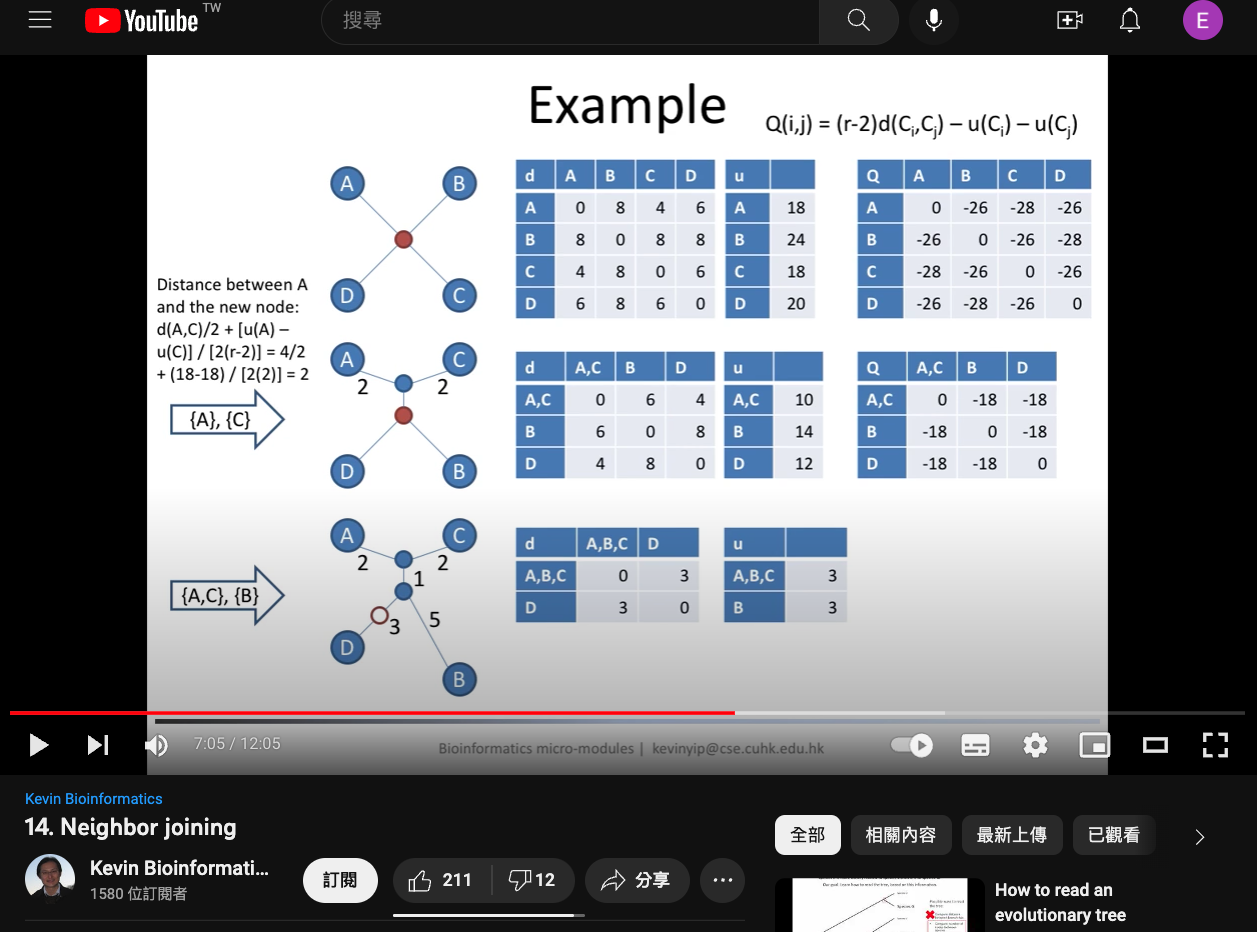

test2

In [35]:
test2 = """4
A 0 17 21 27 
B 17 0 12 18
C 21 12 0 14
D 27 18 14 0"""

names_t2,dist_t2 = parse(test2)

N = len(names_t2) # number of leaves


print("Number of leaves: ", N)

print("The leaf nodes: ", names_t2)

print("Distance matrix: ", dist_t2)

Number of leaves:  4
The leaf nodes:  ['A', 'B', 'C', 'D']
Distance matrix:  [{0: 0.0, 1: 17.0, 2: 21.0, 3: 27.0}, {0: 17.0, 1: 0.0, 2: 12.0, 3: 18.0}, {0: 21.0, 1: 12.0, 2: 0.0, 3: 14.0}, {0: 27.0, 1: 18.0, 2: 14.0, 3: 0.0}]


In [36]:
print(Neighbor_Joining2(names_t2, dist_t2,"A"))

(4.0, (4.0, 10.0, ('C', (), ()), ('D', (), ())), (13.0, 4.0, ('A', (), ()), ('B', (), ())))


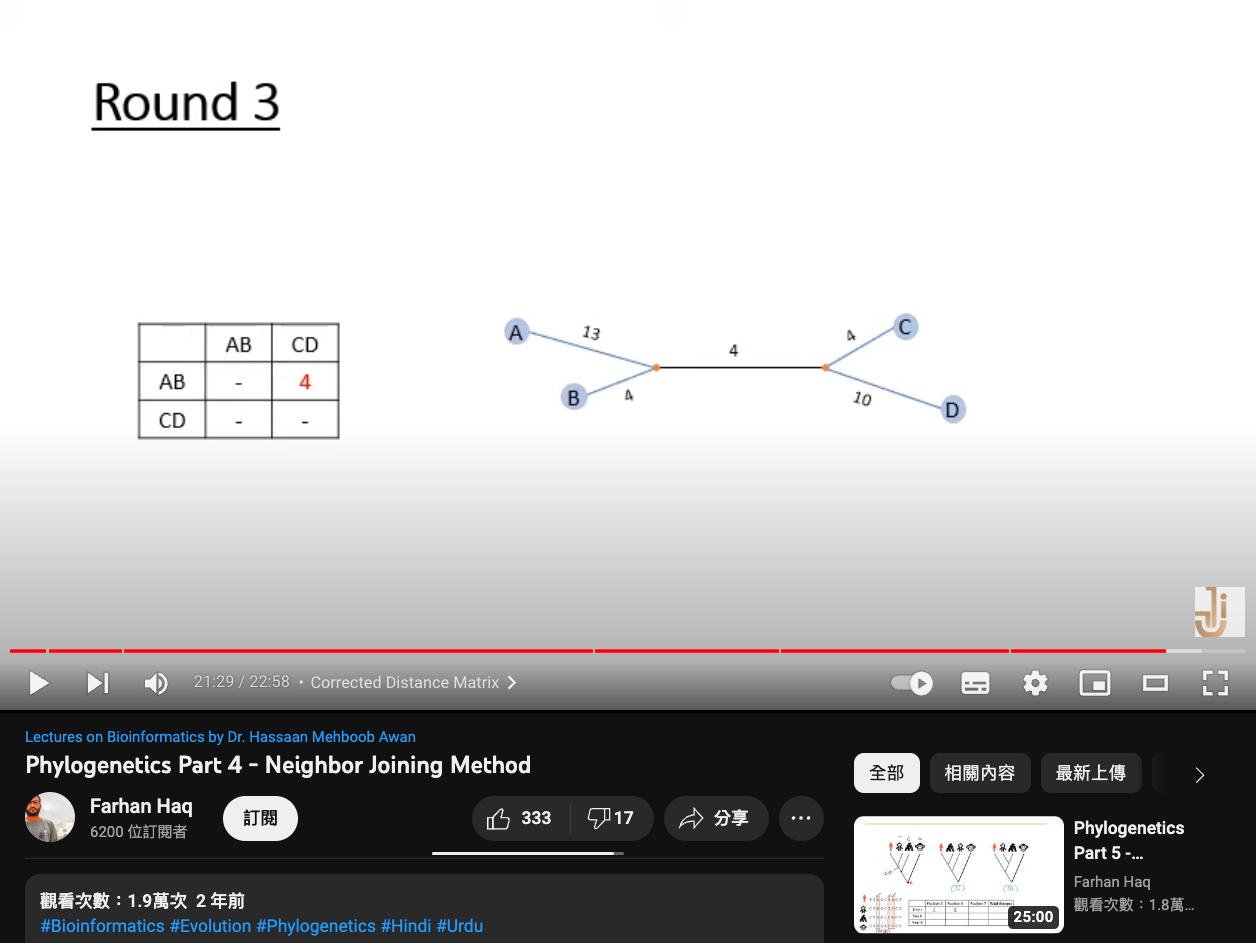



---


**Part 2: Recursive implementation for AdditivePhylogeny**

In [37]:
def AdditivePhylogeny(names, dist,ASCII):
    #--------------------------------------------------------
    # Step 1: Define the base case of AdditivePhylogeny (N=2)
    #         Return the tree consisting of a single edge of length D(1,2)
    #--------------------------------------------------------
    ascii = ord(ASCII)
    if len(names)  == 2:
      print("basecase") #regression check
      basecase = (dist[0][ord(names[-1])-ascii], (names[0],(),()), (names[1],(),()))

      return basecase
    #--------------------------------------------------------
    # Step 2: Pick a node n (i.e., last column), and calculate limb length of n
    #--------------------------------------------------------
    index = []
    index_dict=[]
    for i in range(len(names)) : index.append(i)
    for i in names : index_dict.append(ord(i)-ascii)
    index_dict.sort()
    limb_node = index_dict.pop() # take the otter line in martix as limb
    limb_length =100000000
    # print(index_dict)
    # print(limb)
    from itertools import combinations
    comb = list(combinations(index_dict, 2)) # all combinations to calculate limb 
    for i in comb: 
      calculation_limb = (dist[limb_node][i[0]] + dist[limb_node][i[1]] - dist[i[0]][i[1]])/2
      if calculation_limb < limb_length:
        limb_length = calculation_limb

    # print(limb_length)
    
    # print(comb)

    #--------------------------------------------------------
    # Step 3: Get bald matrix that update the distance in row/column n
    #--------------------------------------------------------
    import copy
    dist_bald = copy.deepcopy(dist)
    count = 0
    for i in range(len(dist)): 
      if count == limb_node: # no need to update the diaganol line
        pass
      else:
        dist_bald[i][limb_node] = dist_bald[i][limb_node] - limb_length # update the column
        dist_bald[limb_node][i] = dist_bald[limb_node][i] - limb_length # update the row
        count += 1
    print("original: ",dist) #regression check
    print("D_blad: ",dist_bald) #regression check
    
    #--------------------------------------------------------
    # Step 4: get i, n, k to figure out where we need attach node n in reduced tree, and get x = D(i,n)
    #--------------------------------------------------------

    #--------------------------------------------------------
    # Step 5: remove a row/column n to D to get reduced distance matrix D*
    #--------------------------------------------------------
    dist_bald_trim = copy.deepcopy(dist_bald)
    for i in range(len(dist_bald_trim)): #remove key(column)
      del dist_bald_trim[i][limb_node]

    del dist_bald_trim[limb_node]

    print("D_blad_trim: ",dist_bald_trim) #regression check
    #--------------------------------------------------------
    # Step 6: remove rows/columns i and j from D
    #--------------------------------------------------------
    # I don't know what is the point in this step
    # we in the previous step we already have original matrix, D_blad, and trim D_bald
    #--------------------------------------------------------
    # Step 7: Call AdditivePhylogeny function recursively on reduced distance matrix to get Tree_reduced.
    #--------------------------------------------------------
    m = AdditivePhylogeny(names[:-1], dist_bald_trim,ASCII)
    #--------------------------------------------------------
    # Step 8: Add the new node in T at distance x from i on the path between i and k
    #         add leaf n back to T by creating a limb (v,n) of length limblength
    #--------------------------------------------------------
    # find the insert point
    parent_id = len(dist_bald)-1
    for i in range(0,len(dist_bald)):
      for j in range(i+1, len(dist_bald)):
        if i == parent_id or j == parent_id:
          continue
        if dist_bald[i][parent_id] + dist_bald[j][parent_id] == dist_bald[i][j]:

          if len(m) == 3:  # got from base case, for a parent for the two leaves
            expanded_tree =  (dist_bald[i][parent_id], dist_bald[j][parent_id], m[1],m[2])
            new_tree = (limb_length,0, (names[-1],(),()),expanded_tree) # leave the new leaf node
          else:
            if len(m[2])==3: # if we have odd node
               if dist_bald[i][parent_id] > m[3][0]: # not inside limblength of i, keep (i,j)
                  expanded_tree1 =  (limb_length, dist_bald[j][parent_id], (names[-1],(),()), m[2])
                  expanded_tree2 = m[3]
                  new_tree = (dist_bald[i][parent_id]- m[3][0], expanded_tree1,expanded_tree2)
               else:# inside limblength of i, merge i with new node, need to re-organize trees
                  expanded_tree1 =  (limb_length, dist_bald[i][parent_id], (names[-1],(),()), m[3][2])
                  expanded_tree2 =  (m[0], m[3][1], m[2], m[3][3])
                  new_tree = (m[3][0] - dist_bald[i][parent_id], expanded_tree1,expanded_tree2)
          break
      else:
        continue
      break


    return new_tree

    # return m

In [38]:
dist_matrix_Q3 = """4
i 0 13 21 22 
j 13 0 12 13
k 21 12 0 13
l 22 13 13 0"""
names_Q3,dist_Q3 = parse(dist_matrix_Q3)

N = len(names_Q3) # number of leaves


print("Number of leaves: ", N)

print("The leaf nodes: ", names_Q3)

print("Distance matrix: ", dist_Q3)

Number of leaves:  4
The leaf nodes:  ['i', 'j', 'k', 'l']
Distance matrix:  [{0: 0.0, 1: 13.0, 2: 21.0, 3: 22.0}, {0: 13.0, 1: 0.0, 2: 12.0, 3: 13.0}, {0: 21.0, 1: 12.0, 2: 0.0, 3: 13.0}, {0: 22.0, 1: 13.0, 2: 13.0, 3: 0.0}]


In [39]:
AdditivePhylogeny(names_Q3, dist_Q3,'i')

original:  [{0: 0.0, 1: 13.0, 2: 21.0, 3: 22.0}, {0: 13.0, 1: 0.0, 2: 12.0, 3: 13.0}, {0: 21.0, 1: 12.0, 2: 0.0, 3: 13.0}, {0: 22.0, 1: 13.0, 2: 13.0, 3: 0.0}]
D_blad:  [{0: 0.0, 1: 13.0, 2: 21.0, 3: 15.0}, {0: 13.0, 1: 0.0, 2: 12.0, 3: 6.0}, {0: 21.0, 1: 12.0, 2: 0.0, 3: 6.0}, {0: 15.0, 1: 6.0, 2: 6.0, 3: 0.0}]
D_blad_trim:  [{0: 0.0, 1: 13.0, 2: 21.0}, {0: 13.0, 1: 0.0, 2: 12.0}, {0: 21.0, 1: 12.0, 2: 0.0}]
original:  [{0: 0.0, 1: 13.0, 2: 21.0}, {0: 13.0, 1: 0.0, 2: 12.0}, {0: 21.0, 1: 12.0, 2: 0.0}]
D_blad:  [{0: 0.0, 1: 13.0, 2: 11.0}, {0: 13.0, 1: 0.0, 2: 2.0}, {0: 11.0, 1: 2.0, 2: 0.0}]
D_blad_trim:  [{0: 0.0, 1: 13.0}, {0: 13.0, 1: 0.0}]
basecase


(4.0,
 (7.0, 6.0, ('l', (), ()), ('k', (), ())),
 (11.0, 2.0, ('i', (), ()), ('j', (), ())))

test1

In [40]:
test1 = """4
A 0 8 4 6 
B 8 0 8 8
C 4 8 0 6
D 6 8 6 0"""

names_t1,dist_t1 = parse(test1)

N = len(names_t1) # number of leaves


print("Number of leaves: ", N)

print("The leaf nodes: ", names_t1)

print("Distance matrix: ", dist_t1)

Number of leaves:  4
The leaf nodes:  ['A', 'B', 'C', 'D']
Distance matrix:  [{0: 0.0, 1: 8.0, 2: 4.0, 3: 6.0}, {0: 8.0, 1: 0.0, 2: 8.0, 3: 8.0}, {0: 4.0, 1: 8.0, 2: 0.0, 3: 6.0}, {0: 6.0, 1: 8.0, 2: 6.0, 3: 0.0}]


In [41]:
AdditivePhylogeny(names_t1, dist_t1,'A')

original:  [{0: 0.0, 1: 8.0, 2: 4.0, 3: 6.0}, {0: 8.0, 1: 0.0, 2: 8.0, 3: 8.0}, {0: 4.0, 1: 8.0, 2: 0.0, 3: 6.0}, {0: 6.0, 1: 8.0, 2: 6.0, 3: 0.0}]
D_blad:  [{0: 0.0, 1: 8.0, 2: 4.0, 3: 3.0}, {0: 8.0, 1: 0.0, 2: 8.0, 3: 5.0}, {0: 4.0, 1: 8.0, 2: 0.0, 3: 3.0}, {0: 3.0, 1: 5.0, 2: 3.0, 3: 0.0}]
D_blad_trim:  [{0: 0.0, 1: 8.0, 2: 4.0}, {0: 8.0, 1: 0.0, 2: 8.0}, {0: 4.0, 1: 8.0, 2: 0.0}]
original:  [{0: 0.0, 1: 8.0, 2: 4.0}, {0: 8.0, 1: 0.0, 2: 8.0}, {0: 4.0, 1: 8.0, 2: 0.0}]
D_blad:  [{0: 0.0, 1: 8.0, 2: 2.0}, {0: 8.0, 1: 0.0, 2: 6.0}, {0: 2.0, 1: 6.0, 2: 0.0}]
D_blad_trim:  [{0: 0.0, 1: 8.0}, {0: 8.0, 1: 0.0}]
basecase


(1.0,
 (3.0, 5.0, ('D', (), ()), ('C', (), ())),
 (2.0, 6.0, ('A', (), ()), ('B', (), ())))

test2

In [42]:
test2 = """4
A 0 17 21 27 
B 17 0 12 18
C 21 12 0 14
D 27 18 14 0"""

names_t2,dist_t2 = parse(test2)

N = len(names_t2) # number of leaves


print("Number of leaves: ", N)

print("The leaf nodes: ", names_t2)

print("Distance matrix: ", dist_t2)

Number of leaves:  4
The leaf nodes:  ['A', 'B', 'C', 'D']
Distance matrix:  [{0: 0.0, 1: 17.0, 2: 21.0, 3: 27.0}, {0: 17.0, 1: 0.0, 2: 12.0, 3: 18.0}, {0: 21.0, 1: 12.0, 2: 0.0, 3: 14.0}, {0: 27.0, 1: 18.0, 2: 14.0, 3: 0.0}]


In [43]:
AdditivePhylogeny(names_t2, dist_t2,'A')

original:  [{0: 0.0, 1: 17.0, 2: 21.0, 3: 27.0}, {0: 17.0, 1: 0.0, 2: 12.0, 3: 18.0}, {0: 21.0, 1: 12.0, 2: 0.0, 3: 14.0}, {0: 27.0, 1: 18.0, 2: 14.0, 3: 0.0}]
D_blad:  [{0: 0.0, 1: 17.0, 2: 21.0, 3: 17.0}, {0: 17.0, 1: 0.0, 2: 12.0, 3: 8.0}, {0: 21.0, 1: 12.0, 2: 0.0, 3: 4.0}, {0: 17.0, 1: 8.0, 2: 4.0, 3: 0.0}]
D_blad_trim:  [{0: 0.0, 1: 17.0, 2: 21.0}, {0: 17.0, 1: 0.0, 2: 12.0}, {0: 21.0, 1: 12.0, 2: 0.0}]
original:  [{0: 0.0, 1: 17.0, 2: 21.0}, {0: 17.0, 1: 0.0, 2: 12.0}, {0: 21.0, 1: 12.0, 2: 0.0}]
D_blad:  [{0: 0.0, 1: 17.0, 2: 13.0}, {0: 17.0, 1: 0.0, 2: 4.0}, {0: 13.0, 1: 4.0, 2: 0.0}]
D_blad_trim:  [{0: 0.0, 1: 17.0}, {0: 17.0, 1: 0.0}]
basecase


(4.0,
 (10.0, 4.0, ('D', (), ()), ('C', (), ())),
 (13.0, 4.0, ('A', (), ()), ('B', (), ())))